In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

data = pd.read_csv('netflix_titles.csv')



Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
data.head(5)

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [8]:
data.shape

(8807, 12)

In [ ]:
data.

In [ ]:
data.columns
data['Numeric_Duration'] = data['Duration'].str.extract('(\d+)').astype(int)
data['Movie_Duration'] = data.apply(lambda row: row['Numeric_Duration'] if row['Type'] == 'Movie' else None, axis=1)

In [ ]:
data['Type'].value_counts().reset_index()

,Type,count
0,TV Show,1527
1,Movie,1473


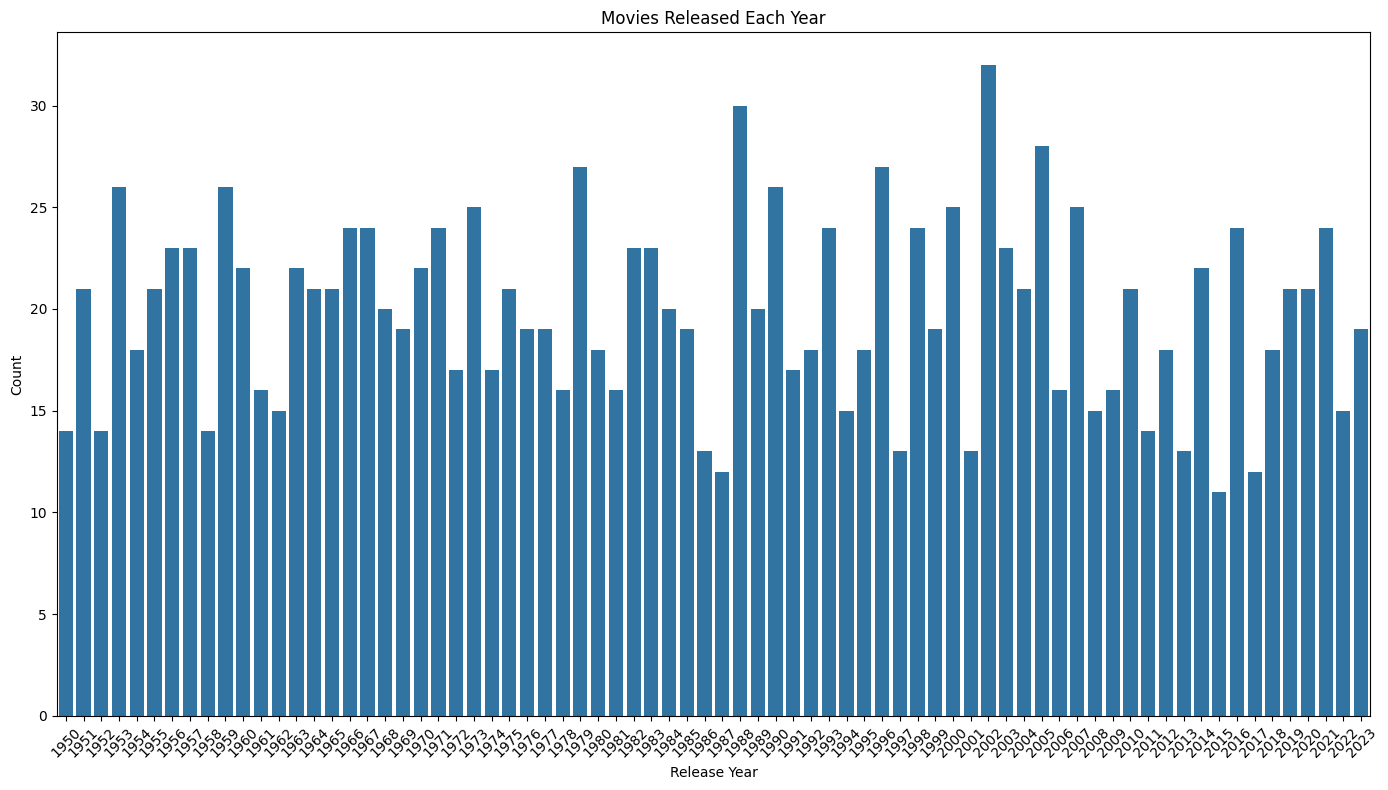

In [ ]:
show_data = data[data['Type']=='TV Show']
movie_data = data[data['Type']=='Movie']
histogram_movies = movie_data['Release Year'].value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='Release Year',y='count',data=histogram_movies)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies Released Each Year')
plt.xticks(rotation = 45)
plt.tight_layout()

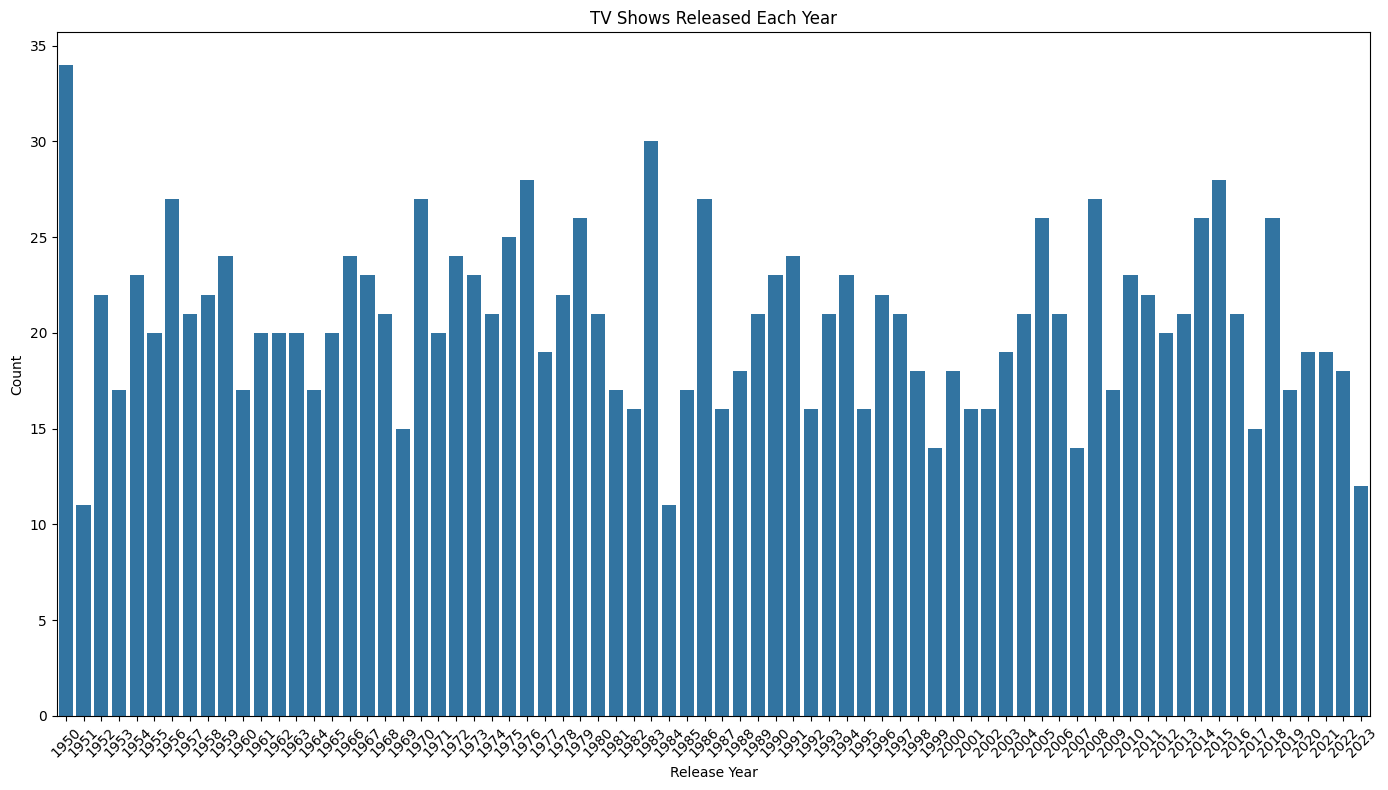

In [ ]:
#Histogram for the release year of shows
show_histogram = show_data['Release Year'].value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='Release Year',y='count',data=show_histogram)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('TV Shows Released Each Year')
plt.xticks(rotation = 45)
plt.tight_layout()

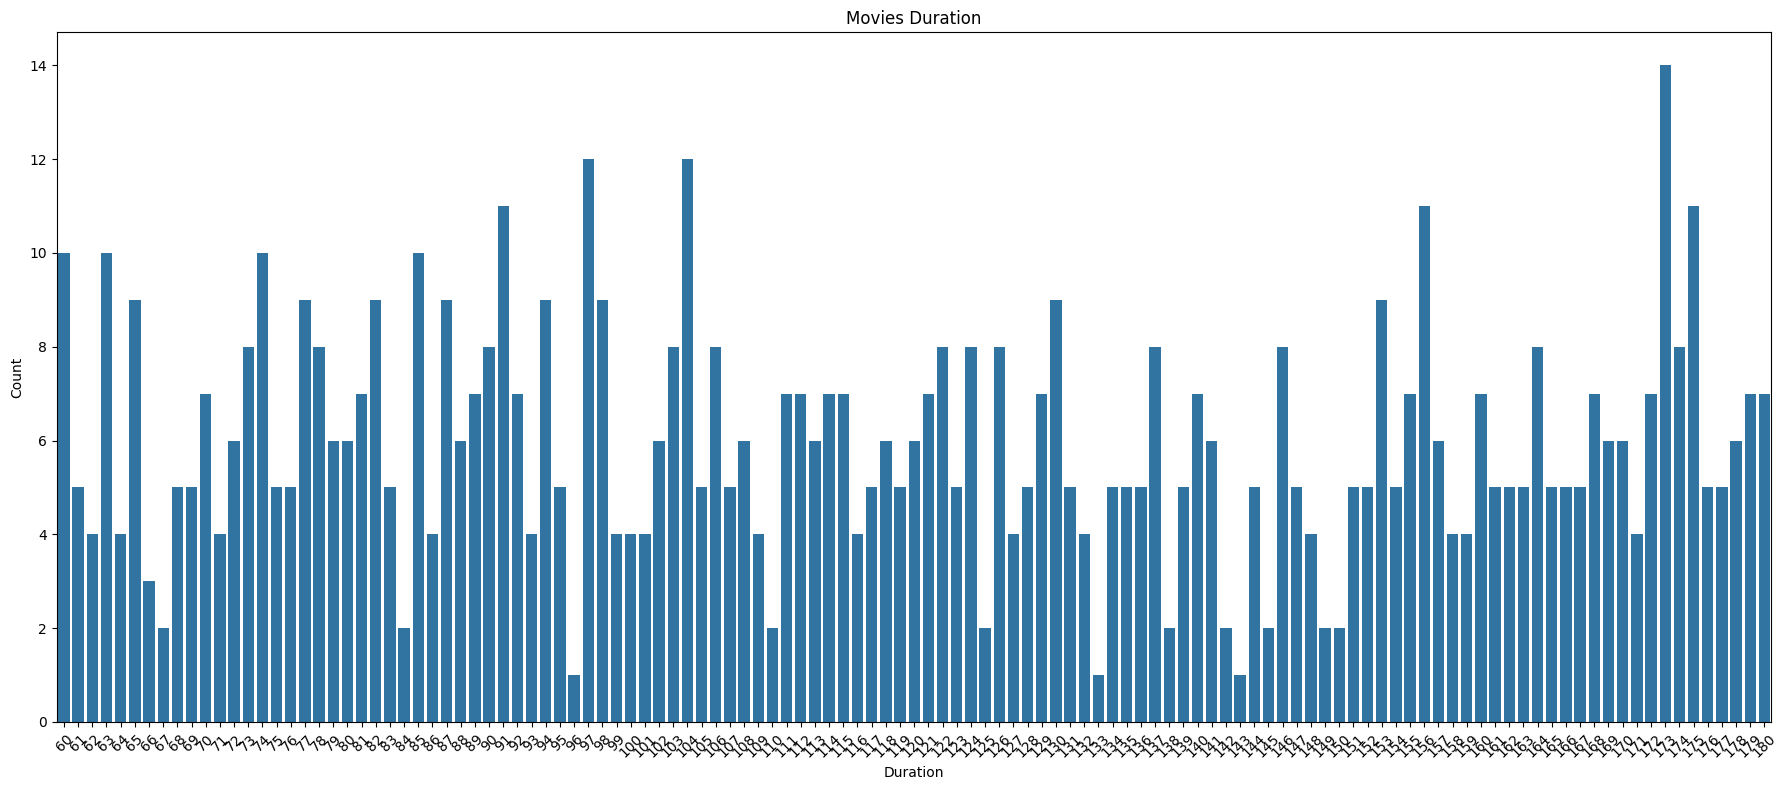

In [ ]:
#Finding an mle and mom estimator for movie duration
movie_data = movie_data[movie_data['Numeric_Duration'] >= 10]
histogram = movie_data['Numeric_Duration'].value_counts().reset_index()
plt.figure(figsize=(18,8))
sns.barplot(x='Numeric_Duration',y='count',data=histogram)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Movies Duration')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
# we assume the movie durations follows an exponential distribution

# Calculate sample mean
sample_mean = np.mean(movie_data['Numeric_Duration'])

# Method of Moments (MoM) estimate
lambda_mom = 1 / sample_mean

# Maximum Likelihood Estimator (MLE)
lambda_mle = 1 / sample_mean
print(f"Sample Mean: {sample_mean}")
print(f"Method of Moments Estimate for lambda: {lambda_mom}")
print(f"Maximum Likelihood Estimate for lambda: {lambda_mle}")

Sample Mean: 119.04
Method of Moments Estimate for lambda: 0.008400537634408602
Maximum Likelihood Estimate for lambda: 0.008400537634408602


In [ ]:
from scipy.stats import expon

# Bootstrap confidence intervals
n_bootstraps = 1000
bootstrapped_means = []

# Resample the data and compute lambda for each sample
for _ in range(n_bootstraps):
    resampled_data = np.random.choice(movie_data['Numeric_Duration'], size=len(movie_data['Numeric_Duration']), replace=True)
    bootstrapped_means.append(1 / np.mean(resampled_data))

# Calculate 95% confidence intervals
lower_ci = np.percentile(bootstrapped_means, 2.5)
upper_ci = np.percentile(bootstrapped_means, 97.5)

print(f"95% Confidence Interval for lambda: ({lower_ci}, {upper_ci})")

95% Confidence Interval for lambda: (0.008218177304856524, 0.008594064504780884)
